## Contour Features, Computer Vision Preprocessing Pipeline
- By Kelvin K.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

Image is height y :339 width x :509 
Image Shape:(339, 509, 3) Notice that the image is given in (y, x)


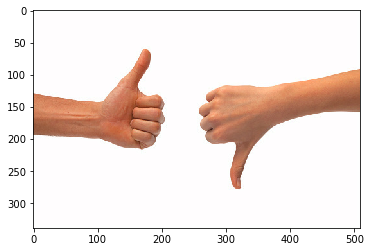

In [92]:
img = cv2.imread('./thumbs-up-down.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
img.shape
print("Image is height y :{} width x :{} \nImage Shape:{} \
Notice that the image is given in (y, x)".format(img.shape[0],img.shape[1],img.shape))

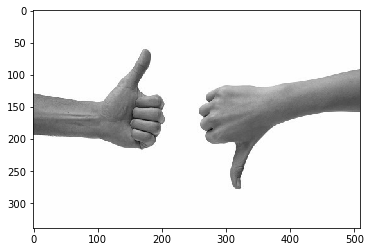

In [19]:
# Convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

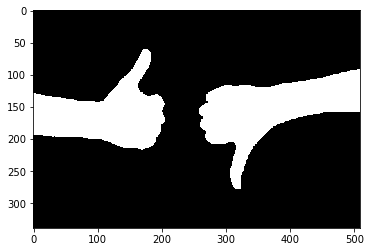

In [42]:
#Create a binary threshold image
retval, binary = cv2.threshold(gray, 230, 255 , cv2.THRESH_BINARY_INV )
plt.imshow(binary, cmap='gray')

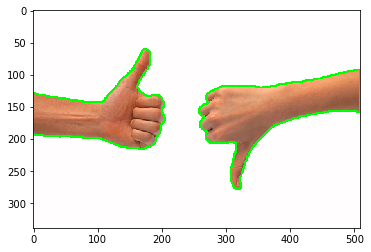

In [37]:
# Find contours from the threshold image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_image = np.copy(img)
# Args: image to draw, contours, display all counters (-1), contor color, contour size
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
plt.imshow(contour_image)


Total number of contours:2
Angle of Contour #0 :61.08085632324219


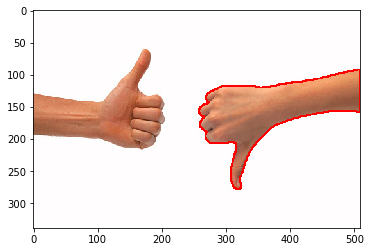

In [64]:
contour_1 = np.copy(img)
# second argument must be an array
# to selectively select contour, check check how many contours are found:
print("Total number of contours:{}".format(len(contours)))
cont_idx = contours[0] #selecting the 0th contour

#Notice that cont_idx must be reshaped back into a list, and the next index argument is now 0 since it is the only contour
cv2.drawContours(contour_1, [cont_idx], 0, (255,0,0), 2)
plt.imshow(contour_1)

#Get angle of contour#0
(x,y), (MA,ma), angle_0 = cv2.fitEllipse(contours[0])
print("Angle of Contour #0 :{}".format(angle_0))

Angle of contour#2 :82.78831481933594


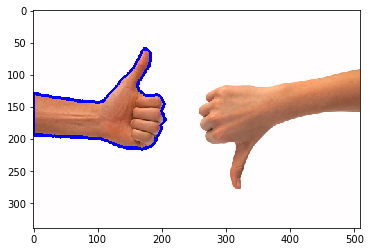

In [63]:
# Example to select Contour #2:
contour_2 = np.copy(img)
cont_2_idx = contours[1]
contour_2 = cv2.drawContours(contour_2, [cont_2_idx], 0, (0,0,255),3)
plt.imshow(contour_2)


# Get the orientation of contour #2
(x,y), (MA,ma), angle = cv2.fitEllipse(contours[1])
print("Angle of contour#2 :{}".format(angle))

In [78]:
c = [ cv2.fitEllipse(c)[2] for c in contours ]
c


[61.08085632324219, 82.78831481933594]

## Crop image by contour
eg. crop the left hand out by first using a bounding Rectangle

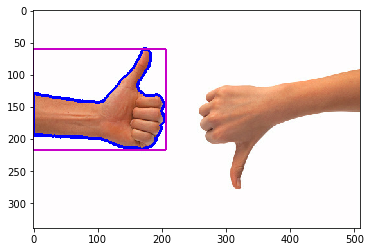

In [81]:
x,y,w,h = cv2.boundingRect(contours[1]) #Create a bounding rectangle coordinates
box_image = cv2.rectangle(contour_2, (x,y), (x+w,y+h), (200,0,200),2)
plt.imshow(box_image)

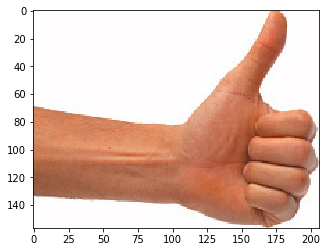

In [93]:
# Crop the image out
cropped_left_hand = img[y:y+h,x:x+w] #Notice that the sequence here is y, x!!
plt.imshow(cropped_image)

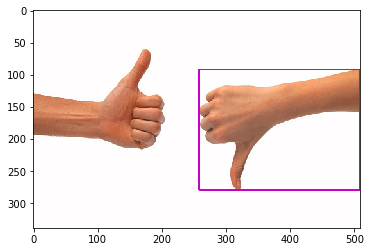

In [95]:
# Selecting the right hand 
x2,y2,w2,h2 = cv2.boundingRect(contours[0]) # Create the bound rectangle
box_image2 = cv2.rectangle(img, (x2,y2), (x2+w2,y2+h2), (200,0,200),2)
plt.imshow(box_image2)


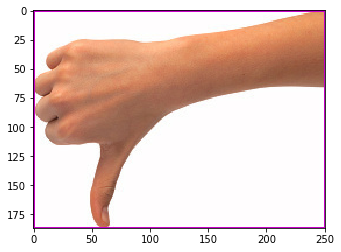

In [96]:
right_hand_image = img[y2:y2+h2,x2:x2+w2]
plt.imshow(right_hand_image)